# Capstone Project - Predicting Severity of an Accident

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Feature Selection & Data Cleaning](#Feature)
* [Feature optimization & Visualization](#Optimization)
* [Modelling](#modelling)
* [Results and Discussion](#results)

## Introduction: Business Problem <a name="introduction"></a>

In this notebook, we will try to predict the severity of an accident using fairly easily acquirable information like
Road, Weather and Light Conditions to name a few. 

</p>Around the world, early warning systems are in place that work to predict and notify the population of an impending disaster, ahead of time. The problem defined here is to apply the same concept to predicting the probability of an Accident and it’s severity. The aim is to predict an accident using weather and local conditions, in addition to some personal/specific features.

This model is targeted towards Road and Safety Authorities as well the common user.The envisioned application is for the common user to receive prior warning about which roads to avoid or whether particular roads on the calculated route have a higher chance of accidents and warrants further attention and precautions.</p>

## Data <a name = "data"></a>

Based on the definition of our problem, the factors that will influence the severity of an accident are :
    * Weather Conditions
    * Light/Visibility Conditions
    * Road Conditions
    * Road Type
    * Vehicle and Driver data will also be useful information.

Dataset  : 
    The dataset used for this project is [UK Road Safety: Traffic Accidents and Vehicles](https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles) which is sourced on Kaggle. 

The dataset comprises of two csv files :
    
    *AccidentInformation.csv: every line in the file represents a unique traffic accident (identified by the Accident_Index column), featuring various properties related to the accident as columns. Date range: 2005-2017
    
    *Vehicle_Information.csv: every line in the file represents the involvement of a unique vehicle in a unique traffic     accident, featuring various vehicle and passenger properties as columns. Date range: 2004-2016

The two above-mentioned files/datasets can be linked through the unique traffic accident identifier (Accident_Index column).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

Reading in the Accident Information & Vehicle Information files into seperate DataFrames and merging them.

In [2]:
#read Accident information into DataFrame
df_Acc = pd.read_csv("Accident_Information.csv")
df_Acc.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
#read Vehicle Information into DataFrame
df_Veh = pd.read_csv("Vehicle_Information.csv",engine = 'python')
df_Veh.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [4]:
print(df_Acc.shape)
print(df_Veh.shape)

(2047256, 34)
(2177205, 24)


In [5]:
#merging the two datasets inner join
df = pd.merge(df_Acc,df_Veh, how = 'inner', on = 'Accident_Index')
df.shape

(2058408, 57)

In [6]:
#Delete this cell 
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',


## Feature Selection and Data Cleaning <a name="Feature"></a>

Next, we choose the fields of data that will be relevant in helping us predict Accident Severity and Probability of the Accident.

Particularly, 
we choose information that is available before the occurence of the Accident, and do not consider data columns that are dependent on Accident itself.

</p>For example,Number of Casualties is directly proportional and defines the Severity of an accident, but it is determined once the accident has occured.To use it in our model will have a direct impact on our Accident Severity prediction.Logically, you cannot predict the number of Casualties in an Accident, without the accident having already taken place.</p>

</p>With an iterative process of Exploratory Data analysis and Visualisation,the following features were chosen :

* Light Conditions
* Road Surface Conditions
* Weather Conditions
* Road Type
* Sex of Driver
* Day of the Week 
* Vehicle Age
* Driver Age Band
* Urban or Rural Area 
* Junction Detail
<]/p>

In [7]:
#choosing relevant columns into df1
# 'Engine_Capacity_.CC.' , 'Accident_Index', 'Speed_limit'
#dropping 'Special_Conditions_at_Site' in this run 
df1 = df[['Accident_Index','Age_Band_of_Driver', 'Speed_limit','Sex_of_Driver','Day_of_Week','Junction_Detail','Light_Conditions','Road_Surface_Conditions', 'Road_Type',
          'Vehicle_Type','Urban_or_Rural_Area', 'Weather_Conditions','Accident_Severity']]
df1.shape

(2058408, 13)

In [8]:
df1.tail()

,Accident_Index,Age_Band_of_Driver,Speed_limit,Sex_of_Driver,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Vehicle_Type,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
2058403,2016984131116,21 - 25,60.0,Female,Tuesday,Crossroads,Daylight,Dry,Single carriageway,Car,Rural,Fine no high winds,Slight
2058404,2016984131116,56 - 65,60.0,Female,Tuesday,Crossroads,Daylight,Dry,Single carriageway,Car,Rural,Fine no high winds,Slight
2058405,2016984131216,56 - 65,70.0,Male,Thursday,Not at junction or within 20 metres,Darkness - no lighting,Wet or damp,Dual carriageway,Goods 7.5 tonnes mgw and over,Rural,Fine no high winds,Slight
2058406,2016984131316,16 - 20,40.0,Male,Saturday,Not at junction or within 20 metres,Darkness - lights lit,Dry,Single carriageway,Car,Rural,Fine no high winds,Slight
2058407,2016984133416,46 - 55,70.0,Male,Sunday,Not at junction or within 20 metres,Daylight,Wet or damp,Dual carriageway,Car,Rural,Raining + high winds,Slight


Dropping any rows with no/empty column values from the DataFrame

In [9]:
df1.dropna(axis = 0,inplace = True)

df1.shape

<ipython-input-9-af3f5437cca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis = 0,inplace = True)


(2058343, 13)

Removing rows with Data values out of range (-1) or Unknown

In [10]:
#for loop to loop through the chosen column parameters/features and remove rows with -1 value corresponding to Data out of range

list1 = df1.columns

for x in list1:
    indexNames = df1[df1[x]== -1].index
    df1.drop(indexNames,axis = 0,inplace = True)
    rangeIndex = df1[df1[x]== "Data missing or out of range"].index
    df1.drop(rangeIndex,axis = 0,inplace = True)
    UnknownIndex = df1[df1[x]== "Unknown"].index
    df1.drop(UnknownIndex,axis = 0,inplace = True)

#Dimensions of dataframe after operation    
df1.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(1856096, 13)

In [11]:
indexNames = df1[df1['Sex_of_Driver']== 'Not known'].index
df1.drop(indexNames,axis = 0,inplace = True)
indexNames = df1[df1['Urban_or_Rural_Area']== 'Unallocated'].index
df1.drop(indexNames,axis = 0,inplace = True)
indexNames = df1[df1['Weather_Conditions']== 'Other'].index
df1.drop(indexNames,axis = 0,inplace = True)

In [12]:
#making sure that Speed_limit is of type integer
df1.astype({'Speed_limit' : 'int32'}).dtypes

Accident_Index             object
Age_Band_of_Driver         object
Speed_limit                 int32
Sex_of_Driver              object
Day_of_Week                object
Junction_Detail            object
Light_Conditions           object
Road_Surface_Conditions    object
Road_Type                  object
Vehicle_Type               object
Urban_or_Rural_Area        object
Weather_Conditions         object
Accident_Severity          object
dtype: object

Plotting the distribution of Accident Severity in the Dataset : 

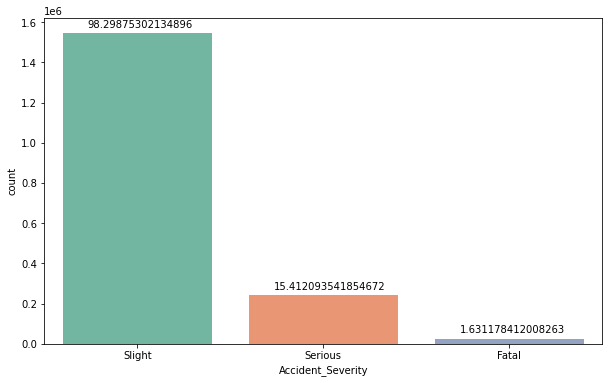

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = 'Accident_Severity',data = df1,palette = 'Set2')

for p in ax.patches:
        percentage = (p.get_height()*100/1571318)
        x = p.get_x() + p.get_width()/6
        y = p.get_height() + 30000
        ax.annotate(percentage, (x, y))


#### The ratio of slight to serious to Fatal accidents is approximately 85 : 13 : 2

In [14]:
df1['Accident_Severity'].value_counts()

Slight     1544586
Serious     242173
Fatal        25631
Name: Accident_Severity, dtype: int64

</p>Our current dataset has over 2 million rows, which will take a considerable amount of time to compute and process.Futhermore, the dataset is not balanced, with over 1.3 million rows predicting a 'Slight' Accident Severity.To cut down on processing and compute times,we are downsampling the dataset to a maximum limit of 650,000 rows.</p>


In [15]:
#resampling 
#since 2 million rows involves too much computation time and the majority of rows are predicting severity slight, lets try
# resampling with a max of 600,000 rows 
from sklearn.utils import resample

df_slight = df1[df1.Accident_Severity == 'Slight']
df_serious = df1[df1.Accident_Severity == 'Serious']
df_fatal = df1[df1.Accident_Severity == 'Fatal']

df_slight_downsampled = resample(df_slight, 
                                 replace=False,    # sample without replacement
                                 n_samples= 373665,     # to match minority class
                                 random_state=4) # reproducible results

In [16]:
print(df_slight.shape,df_serious.shape,df_fatal.shape)

(1544586, 13) (242173, 13) (25631, 13)


In [17]:
df_down = pd.concat([df_slight_downsampled,df_serious,df_fatal],axis = 0)

df_down.shape

(641469, 13)

</p>Preliminary runs of the model showed that the model performance on predicting accidents of Fatal Severity was below par, mainly due to the small number of records available to train the model.Initial runs produced results with accuracy less than 10%. 
This is a major contributor to bringing down the average model performance.Therefore, we are combining the 'Serious' and 'Fatal' categories of Accident Severity into a composite "Serious or Fatal" category.</p> 

In [18]:
df_down['Accident_Severity'].value_counts()
df_down['Accident_Severity'].replace('Fatal','Serious or Fatal',inplace = True)
df_down['Accident_Severity'].replace('Serious','Serious or Fatal',inplace = True)

In [19]:
split=pd.DataFrame(df_down['Accident_Severity'].value_counts())
split

,Accident_Severity
Slight,373665
Serious or Fatal,267804


## Feature Optimization and Visualization <a name = "Optimization"></a>

</p>In the Visualization section, we plot and graphically visualize our chosen variables to identify trends in each variable.</p>

In [20]:
weather = pd.DataFrame(df_down['Weather_Conditions'].value_counts())
weather

,Weather_Conditions
Fine no high winds,539208
Raining no high winds,75498
Raining + high winds,9226
Fine + high winds,8606
Snowing no high winds,4104
Fog or mist,4019
Snowing + high winds,808


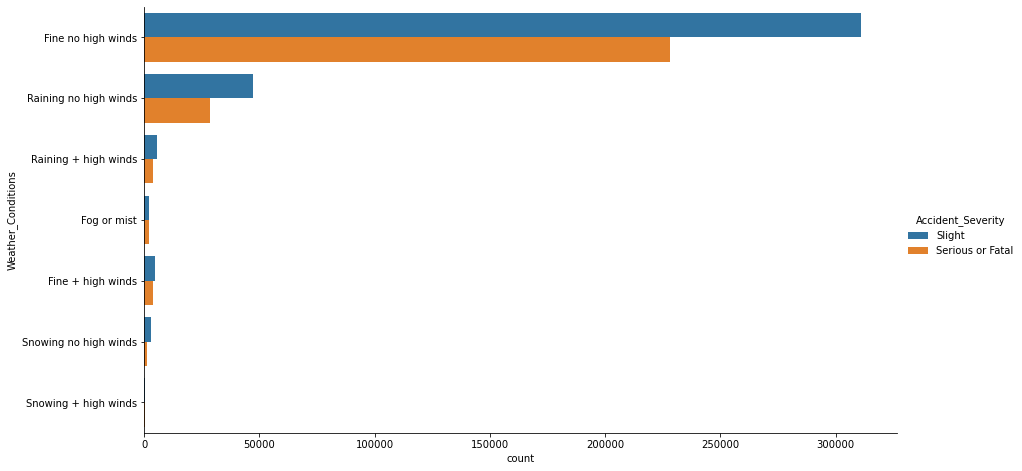

In [21]:
sns.catplot(y="Weather_Conditions", hue="Accident_Severity", kind = 'count',sharex = True,
                 sharey = False,data=df_down,dodge = True,height = 6.45,aspect = 2)

</p>As we can see, the Weather conditions are split to numerous categories with some categories barely having any data. We are combining these similar categories together to reduce the number of different categories and increase the data available in each category, thereby hopefully improving model performance. </p>

In [22]:
#combining subcategories into 1 main category each 
list1 = ['Fine no high winds','Fine + high winds']
df_down['Weather_Conditions'].replace(list1,'Fine', inplace  = True)

#
list2 = ['Raining no high winds','Raining + high winds']
df_down['Weather_Conditions'].replace(list2,'Rain', inplace  = True)

list3 = ['Snowing no high winds','Snowing + high winds']
df_down['Weather_Conditions'].replace(list3,'Snow', inplace  = True)

df_down['Weather_Conditions'].value_counts()

Fine           547814
Rain            84724
Snow             4912
Fog or mist      4019
Name: Weather_Conditions, dtype: int64

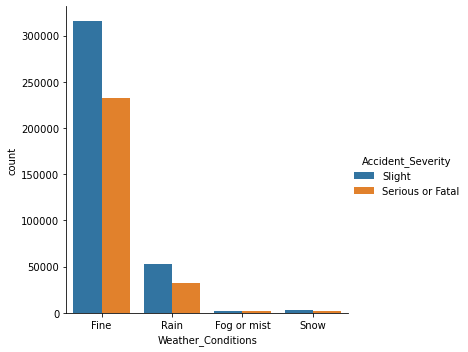

In [23]:
#count of accidents vs Weather conditions
g = sns.catplot(x="Weather_Conditions", hue="Accident_Severity", kind = 'count',sharex = True,
                 sharey = False,data=df_down,dodge = True)

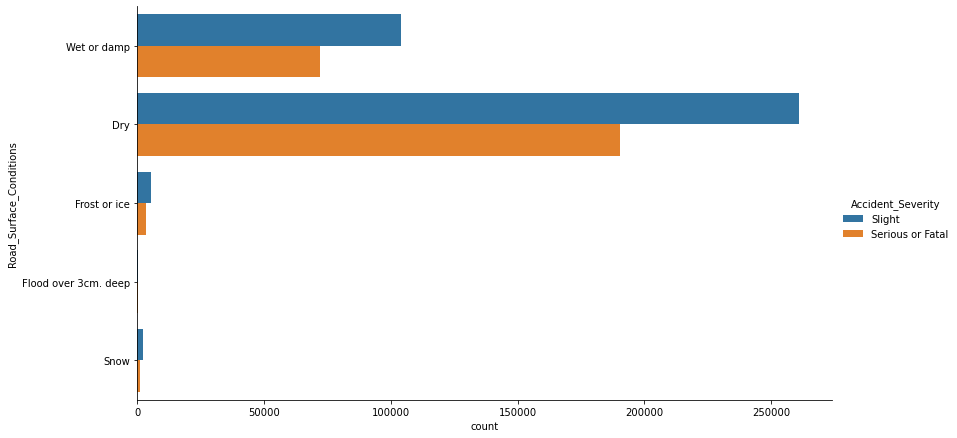

In [24]:
#Count of Accidents vs Road Surface Conditions
ax = sns.catplot(y="Road_Surface_Conditions", hue='Accident_Severity',kind = 'count',sharex = True,
                 sharey = False,data=df_down,height = 6,aspect=2,dodge = True,legend = True)
#plt.legend(title='Road Conditions', loc='upper right', labels=['Dry','Wet or Damp','Snow','Frost','Rain'])

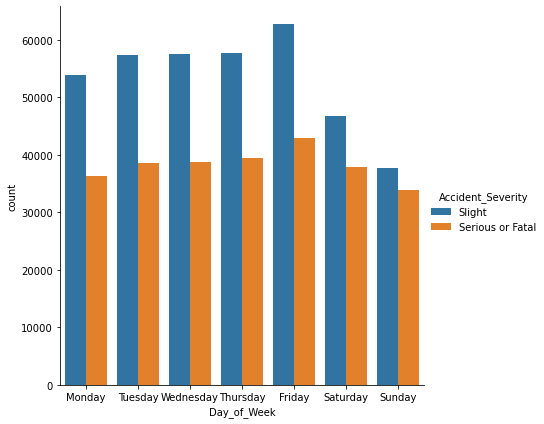

In [25]:
#Plotting count of Accidents of each severity vs Day_of_Week
Weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.catplot(x="Day_of_Week", hue="Accident_Severity",
                data=df_down, kind="count",sharey = False,sharex = True,
                height=6, aspect=1,dodge = True,order = Weekday_order)

#ax.set_xticklabels(ax.get_xlabels(),rotation = 90,horizontalalignment = 'right')

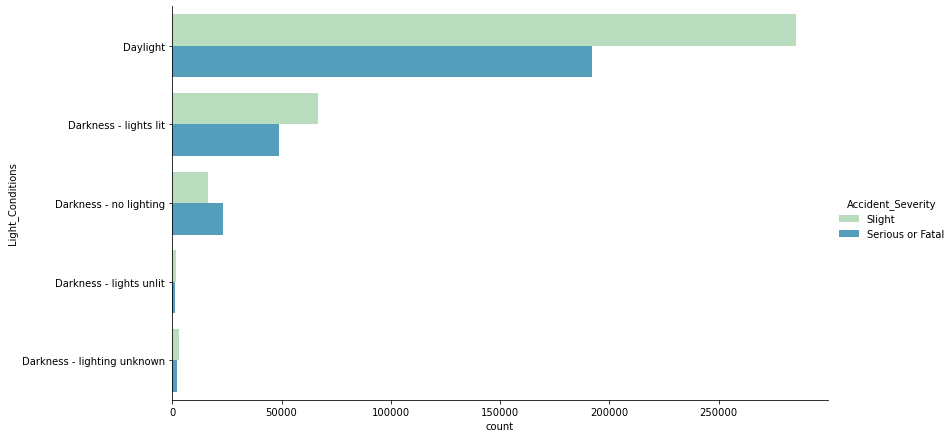

In [26]:
# Count of Accidents vs Light Conditions
#order1 = df_down.groupby(by = ['Light_Conditions'])['Accident_Severity'].sum().sort_values(ascending = False).index
ax = sns.catplot(y="Light_Conditions", hue="Accident_Severity",
                 data=df_down, kind="count",sharey = True,sharex = False,dodge = True,#order = order1 ,
                height=6, aspect=2,palette = 'GnBu')
#for p in ax.patches:
 #   ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

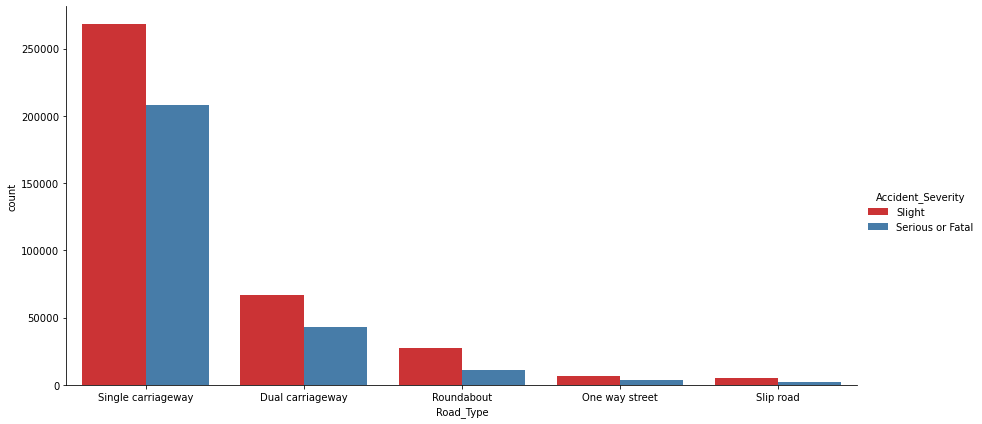

In [27]:
#count of accidents vs Road Type
ax = sns.catplot(x="Road_Type", hue= 'Accident_Severity', kind = 'count',sharex = False,dodge = True,
                 sharey = False,data=df_down,height = 6,aspect=2,palette = "Set1")

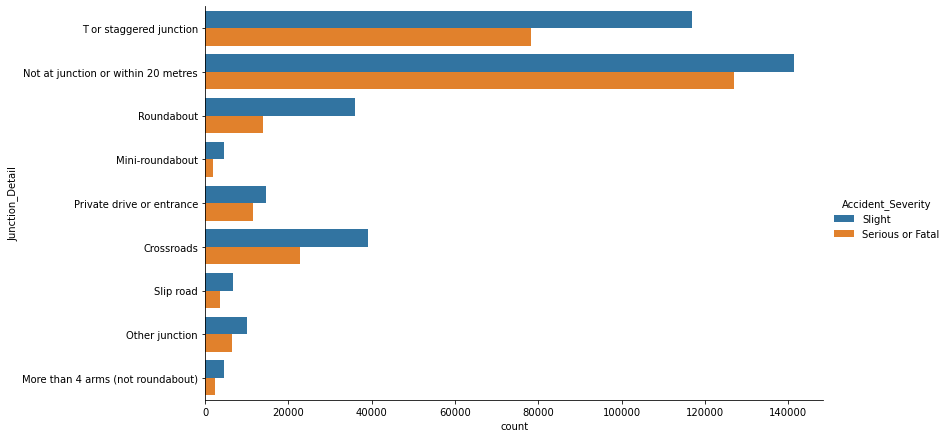

In [28]:
#Junction detail vs no of accidents
ax = sns.catplot(y="Junction_Detail", hue="Accident_Severity", kind = 'count',sharex = False,dodge = True,
                 sharey = False,data=df_down,height = 6,aspect=2)

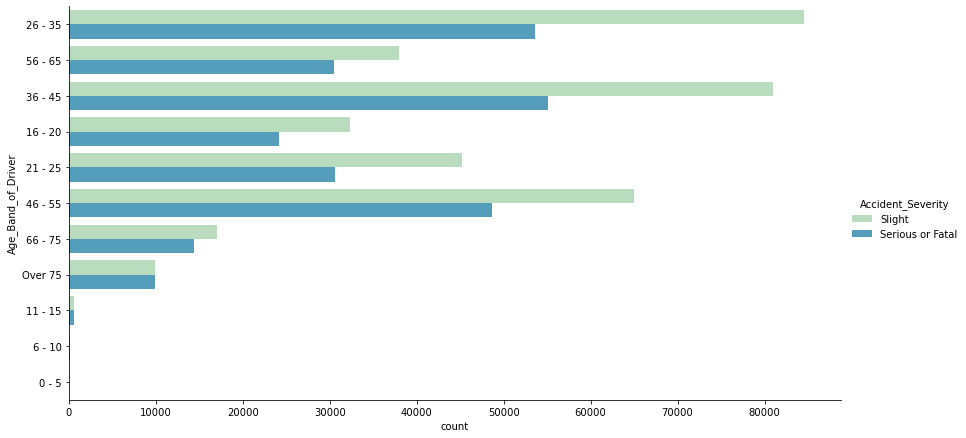

In [29]:
#Special conditions at Site vs count of Accidents 
ax = sns.catplot(y="Age_Band_of_Driver", hue="Accident_Severity",kind = 'count',sharex = False,
                 sharey = True,data=df_down,height = 6,aspect=2,dodge = True,palette = 'GnBu')

#### Vehicle Types 

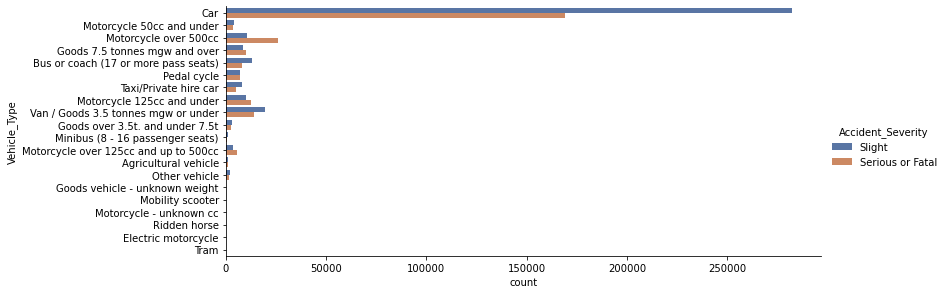

In [30]:
ax = sns.catplot(y="Vehicle_Type",hue='Accident_Severity', kind = 'count',sharex = False,
                 sharey = True,data=df_down,height = 4,aspect=3,dodge = True,palette = 'deep')

</p>From the graph above, we see that there are far too many categories of Vehicles with little to no data.Rearranging and combining the specific categories into a more general definition in the next step.</p>

In [31]:
# combining all types of Goods vehicles into 1 category
list1 = ['Van / Goods 3.5 tonnes mgw or under','Goods 7.5 tonnes mgw and over','Goods over 3.5t. and under 7.5t','Goods vehicle - unknown weight']
df_down['Vehicle_Type'].replace(list1,'Goods Vehicle',inplace = True)
# combining all types of Motocycles into 1 category
list2 = ['Motorcycle over 500cc','Motorcycle 125cc and under','Motorcycle over 125cc and up to 500cc',
         'Motorcycle 50cc and under','Motorcycle - unknown cc','Electric motorcycle','Mobility scooter']
df_down['Vehicle_Type'].replace(list2,'Motorcycle',inplace = True)
# combining all types of Buses into 1 category
list3 = ['Bus or coach (17 or more pass seats)','Minibus (8 - 16 passenger seats)']
df_down['Vehicle_Type'].replace(list3,'Bus',inplace = True)

df_down['Vehicle_Type'].replace('Taxi/Private hire car','Car',inplace = True)

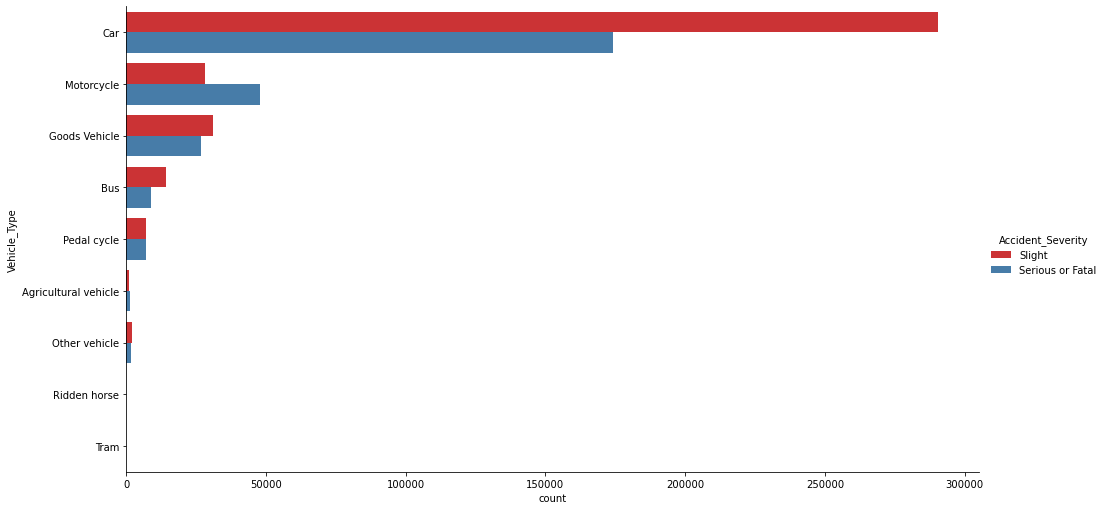

In [32]:
#replotting Vehicle Type with modified categories
ax = sns.catplot(y="Vehicle_Type",hue = 'Accident_Severity', kind = 'count',sharex = True,
                 sharey = True,data=df_down,height = 7,aspect=2,dodge = True,palette = 'Set1')

Next,we plot the distribution of Accident Severity v/s Type of Area

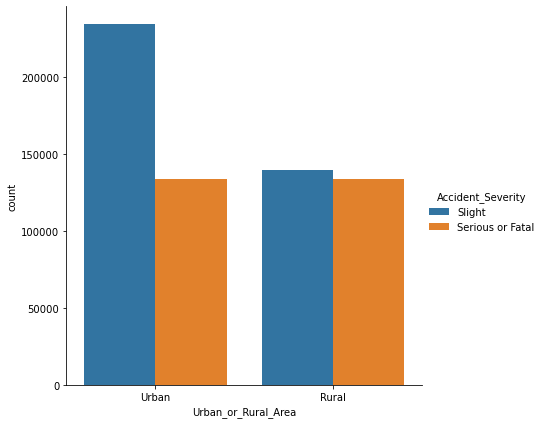

In [33]:
#Area Type vs count of Accident Severity
ax = sns.catplot(x="Urban_or_Rural_Area",hue = 'Accident_Severity', kind = 'count',sharex = False,
                 sharey = False,data=df_down,height = 6,aspect=1, dodge = True)

In [34]:
df_down['Sex_of_Driver'].value_counts()

Male      459707
Female    181762
Name: Sex_of_Driver, dtype: int64

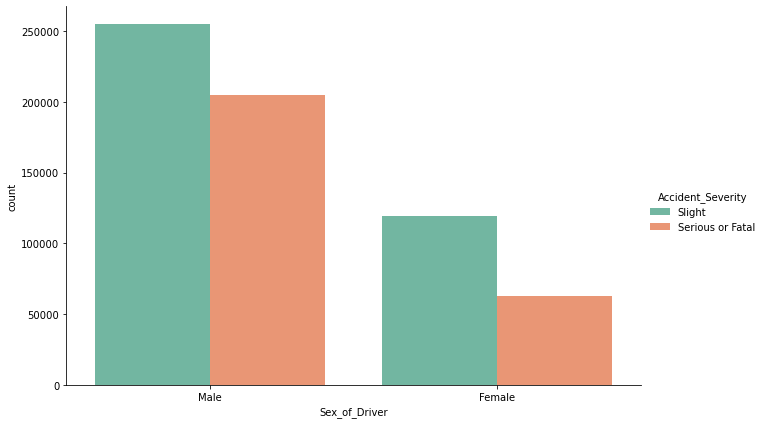

In [35]:
ax = sns.catplot(x="Sex_of_Driver",hue = 'Accident_Severity', kind = 'count',sharex = False,
          sharey = False,data=df_down,height = 6,aspect=1.5, dodge = True, palette = 'Set2')

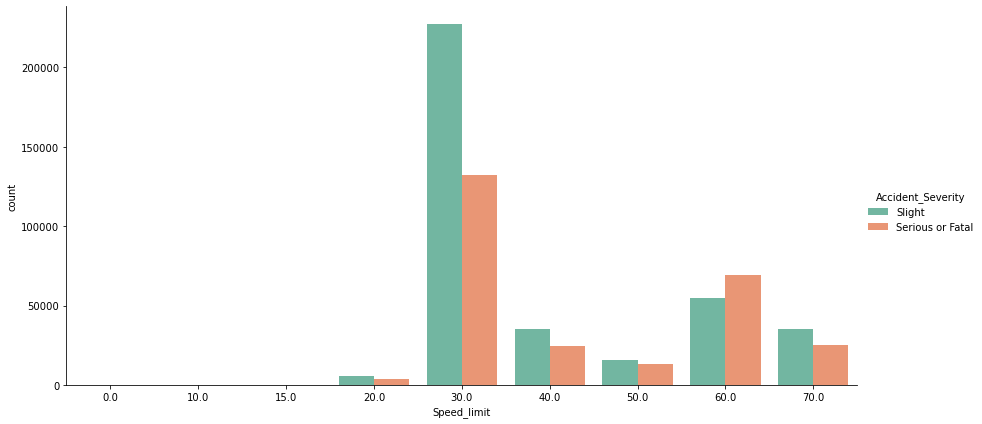

In [36]:
sns.catplot(x="Speed_limit",hue = 'Accident_Severity', kind = 'count',sharex = False,
          sharey = False,data=df_down,height = 6,aspect=2, dodge = True, palette = 'Set2')

#### Preparing Dataframe for modelling

In [38]:
#choose categorical columns
#target_col = ['Accident_Severity']
df_temp = df_down[['Accident_Severity','Speed_limit']]
df_down.drop('Speed_limit',axis = 1, inplace = True)
df_down.drop('Accident_Index',axis = 1, inplace = True)
cat_cols = df_down.columns

cat_cols

Index(['Age_Band_of_Driver', 'Sex_of_Driver', 'Day_of_Week', 'Junction_Detail',
       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
       'Vehicle_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Accident_Severity'],
      dtype='object')

In [39]:
#copying dataframe
df_model = df_down[cat_cols].copy()
df_model.shape
df_model.drop('Accident_Severity', axis = 1, inplace = True)


In [40]:
#get dummies before merging with numerical columns
dummies = pd.get_dummies(df_model, drop_first=False)
df_model = pd.concat((df_temp, dummies), axis=1)
df_model.shape

(641469, 61)

In [43]:
df_model.head()

,Accident_Severity,Speed_limit,Age_Band_of_Driver_0 - 5,Age_Band_of_Driver_11 - 15,Age_Band_of_Driver_16 - 20,Age_Band_of_Driver_21 - 25,Age_Band_of_Driver_26 - 35,Age_Band_of_Driver_36 - 45,Age_Band_of_Driver_46 - 55,Age_Band_of_Driver_56 - 65,...,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse,Vehicle_Type_Tram,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Fog or mist,Weather_Conditions_Rain,Weather_Conditions_Snow
920039,Slight,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
458984,Slight,30.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1490967,Slight,60.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1586776,Slight,50.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
422025,Slight,30.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [44]:
df_model['Accident_Severity'].replace('Slight','1',inplace = True)
df_model['Accident_Severity'].replace('Serious or Fatal','2',inplace = True)
df_model.head()

,Accident_Severity,Speed_limit,Age_Band_of_Driver_0 - 5,Age_Band_of_Driver_11 - 15,Age_Band_of_Driver_16 - 20,Age_Band_of_Driver_21 - 25,Age_Band_of_Driver_26 - 35,Age_Band_of_Driver_36 - 45,Age_Band_of_Driver_46 - 55,Age_Band_of_Driver_56 - 65,...,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse,Vehicle_Type_Tram,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Fog or mist,Weather_Conditions_Rain,Weather_Conditions_Snow
920039,1,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
458984,1,30.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1490967,1,60.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1586776,1,50.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
422025,1,30.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [46]:
df_model.astype({'Accident_Severity' : 'int32'}).dtypes

Accident_Severity                   int32
Speed_limit                       float64
Age_Band_of_Driver_0 - 5            uint8
Age_Band_of_Driver_11 - 15          uint8
Age_Band_of_Driver_16 - 20          uint8
                                   ...   
Urban_or_Rural_Area_Urban           uint8
Weather_Conditions_Fine             uint8
Weather_Conditions_Fog or mist      uint8
Weather_Conditions_Rain             uint8
Weather_Conditions_Snow             uint8
Length: 61, dtype: object

In [47]:
# define features 
features = df_model.drop(['Accident_Severity'], axis=1)
# define target
target = df_model['Accident_Severity']

from sklearn.model_selection import train_test_split
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [48]:
X_train.columns

Index(['Speed_limit', 'Age_Band_of_Driver_0 - 5', 'Age_Band_of_Driver_11 - 15',
       'Age_Band_of_Driver_16 - 20', 'Age_Band_of_Driver_21 - 25',
       'Age_Band_of_Driver_26 - 35', 'Age_Band_of_Driver_36 - 45',
       'Age_Band_of_Driver_46 - 55', 'Age_Band_of_Driver_56 - 65',
       'Age_Band_of_Driver_6 - 10', 'Age_Band_of_Driver_66 - 75',
       'Age_Band_of_Driver_Over 75', 'Sex_of_Driver_Female',
       'Sex_of_Driver_Male', 'Day_of_Week_Friday', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Junction_Detail_Crossroads', 'Junction_Detail_Mini-roundabout',
       'Junction_Detail_More than 4 arms (not roundabout)',
       'Junction_Detail_Not at junction or within 20 metres',
       'Junction_Detail_Other junction',
       'Junction_Detail_Private drive or entrance',
       'Junction_Detail_Roundabout', 'Junction_Detail_Slip road',
       'Junction_Detail_T or stagg

## Modelling <a name= "modelling"> </a>

### Random Forest Classifier

In [49]:
df_model['Accident_Severity'].value_counts(normalize=True)

1    0.582515
2    0.417485
Name: Accident_Severity, dtype: float64

In [50]:
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [51]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(n_estimators = 50,random_state=4, criterion='entropy', n_jobs=-1)# class_weight='balanced')

# training
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

y_test_prob = forest_1.predict_proba(X_test)
print(y_test_prob)
# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)


[[0.65557055 0.34442945]
 [0.79139882 0.20860118]
 [0.50695763 0.49304237]
 ...
 [0.81603454 0.18396546]
 [0.47374101 0.52625899]
 [0.75764146 0.24235854]]
Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

           1       0.64      0.77      0.70     74910
           2       0.55      0.41      0.47     53384

    accuracy                           0.62    128294
   macro avg       0.60      0.59      0.58    128294
weighted avg       0.61      0.62      0.60    128294



In [52]:
w = pd.DataFrame(data = y_test_preds, columns = ['predicted Severity'])
w['predicted Severity'].value_counts()

1    89059
2    39235
Name: predicted Severity, dtype: int64

In [53]:
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.58326948, 0.58419056, 0.58493715, 0.58231859, 0.58450269])

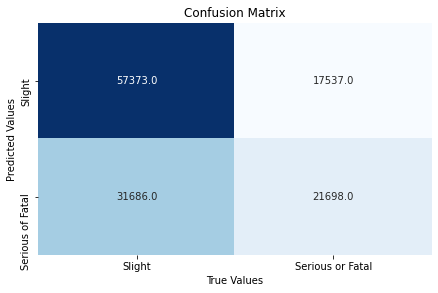

In [69]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[ 'Slight', 'Serious of Fatal'], 
                         columns=['Slight', 'Serious or Fatal'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues',fmt = '.1f')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [55]:
print(confusion_matrix(y_test, y_test_preds))

[[57373 17537]
 [31686 21698]]


In [94]:
jaccard_score(y_test, y_test_preds,pos_label = '1')

0.5382284513490188

## K Nearest Neighbour

In [98]:
#KNN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [99]:
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
yhat1=neigh.predict(X_test)

#mean_acc
print(metrics.accuracy_score(y_test, yhat))

0.5993031630473755


In [100]:
jaccard_score(y_test, yhat1,pos_label = '1')

0.5426667615607708

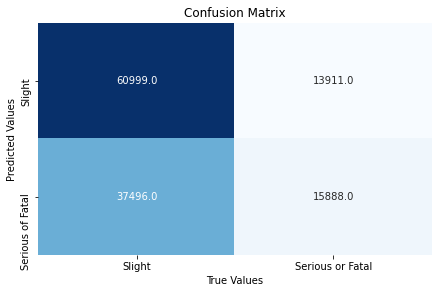

In [104]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, yhat1)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[ 'Slight', 'Serious of Fatal'], 
                         columns=['Slight', 'Serious or Fatal'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues',fmt = '.1f')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [102]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           1       0.62      0.81      0.70     74910
           2       0.53      0.30      0.38     53384

    accuracy                           0.60    128294
   macro avg       0.58      0.56      0.54    128294
weighted avg       0.58      0.60      0.57    128294



## Logistic Regression 

In [58]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='newton-cg',class_weight = 'balanced').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg')

In [59]:
yhat = LR.predict(X_test)
yhat[0:5]

array(['1', '1', '2', '2', '2'], dtype=object)

In [60]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.72870914, 0.27129086],
       [0.55939342, 0.44060658],
       [0.33856397, 0.66143603],
       ...,
       [0.67598749, 0.32401251],
       [0.4286987 , 0.5713013 ],
       [0.39346924, 0.60653076]])

In [80]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = '1')

0.49723136020923153

In [62]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.68      0.65      0.66     74910
           2       0.54      0.57      0.55     53384

    accuracy                           0.62    128294
   macro avg       0.61      0.61      0.61    128294
weighted avg       0.62      0.62      0.62    128294



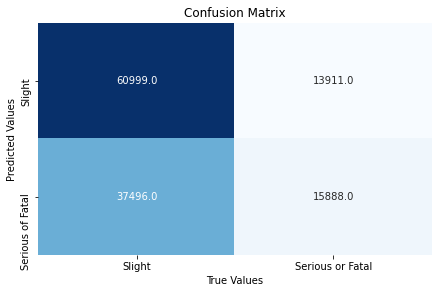

In [103]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, yhat)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[ 'Slight', 'Serious of Fatal'], 
                         columns=['Slight', 'Serious or Fatal'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues',fmt = '.1f')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [91]:
log_loss(y_test,yhat,normalize = True)

20.167425114083706

### Decision Trees 

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
SeverTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7,class_weight = 'balanced')
SeverTree

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7)

In [65]:
SeverTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7)

In [66]:
predTree = SeverTree.predict(X_test)

In [67]:
print(confusion_matrix(y_test,predTree))

[[49427 25483]
 [23731 29653]]


In [68]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6163967137979952


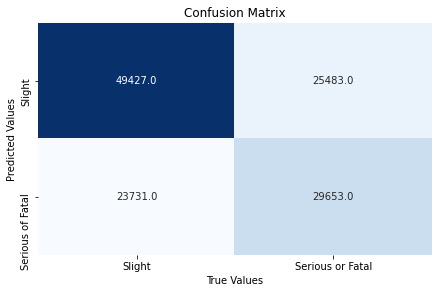

In [105]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, predTree)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[ 'Slight', 'Serious of Fatal'], 
                         columns=['Slight', 'Serious or Fatal'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues',fmt = '.1f')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [97]:
print(classification_report(y_test,predTree))


              precision    recall  f1-score   support

           1       0.68      0.66      0.67     74910
           2       0.54      0.56      0.55     53384

    accuracy                           0.62    128294
   macro avg       0.61      0.61      0.61    128294
weighted avg       0.62      0.62      0.62    128294



In [93]:
jaccard_score(y_test, predTree,pos_label = '1')

0.5010796727527094

##  Results & Discussion <a name = "results"></a>

| Model | Precision | Accuracy | F1-Score | Jaccard Score |
| ----------- | ----------- |----------- |----------- |----------- |
| Random Forest | 0.61 | 0.62 | 0.60 | 0.53 |
| KNN | 0.58 | 0.60 | 0.57 | 0.54 | 
| Logistic Regression  | 0.62 | 0.62 | 0.62 | 0.49 |
|Decision Trees  | 0.62 | 0.62 | 0.62 | 0.50 | 



</p> We have succesfully built multiple models that predicts Accident Severity and its' probability with chosen set of features.
All the different models used have yielded similar result across the board with neglible differences.The models built have an accuracy of 62% and is a reflection of the general accuracy, given that the dataset used in question is for the Entire United Kingdom through years 2004-2017. </p>

This notebook can be considered a preliminary/opening incursion into predicting accident severity.The model reflects data collected at a macro level and is therfore harder to include highly contextual data into the model.Ideally, to improve the model's performance, we should narrow our field of study to a smaller region in the UK, a city preferrably and work on predicting accident severity for that smaller region.This will help contextualize the data more than we are currently able to do so.Another thing that could be added into the model is location data for the accidents.

Using the model with location specific data and trends from Google Maps/Waze will help in improving model performance and also personalizing the predictions. It could also suggest alternate routes avoiding accident prone areas or alternate forms of transport. With the additional data and context that these applications could provide, it would also be possible to identify accident hotspots particular to a specific weather/light condition. For example, a particular road sees increased number of accidents when it is raining. The transport and road safety organization could then look at the data and suggest measures to reduce the risk of accidents, like imposing a lower speed limit when it is raining. These suggested applications for the model are obviously much more difficult to execute and realize, but if done, could work to reduce accidents and increase safety on dangerous roads.</p>



